In [157]:
# 설문지에서 특정 영역 추출 및 분석

from PIL import Image
import pytesseract
import os
from pytesseract import Output

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'


In [158]:
def getText(src):
    cv.imwrite('temp.png', src)        
    text = pytesseract.image_to_string(Image.open('temp.png'), lang='kor')
    print(text)
    
def drawCont(src, contours):
    for i in range(len(contours)):
        c = tuple(np.random.choice(range(256), size=3))
        color = (int(c[0]), int(c[1]), int(c[2]))
        cv.drawContours(src, contours, i, color, 3)
        src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
        plt.imshow(src)

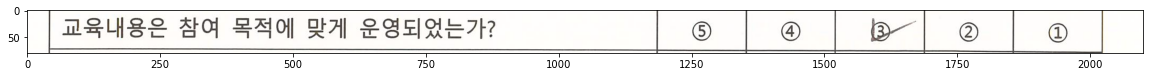

In [159]:
img = cv.imread('./poll1.jpg')
roi = img[1320:1400, 300:2400]

plt.imshow(roi)

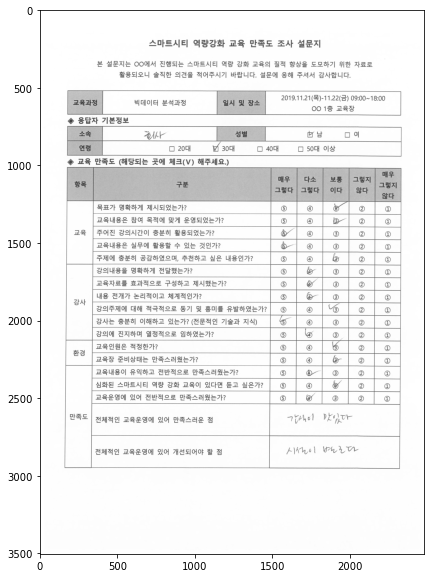

In [160]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.rcParams["figure.figsize"] = (20,10)

plt.imshow(gray, cmap='gray')

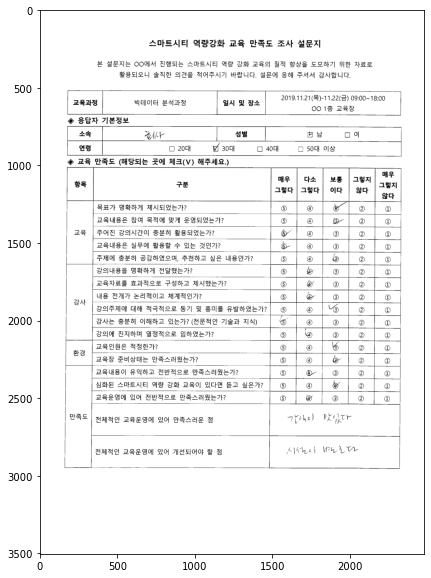

In [161]:
ret, thresh =  cv.threshold(gray,127,255,cv.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

In [162]:
img.shape, gray.shape, roi.shape

((3504, 2478, 3), (3504, 2478), (80, 2100, 3))

1.png -1817026.0 6906235.5 (770, 34) (1921, 22) (1921, 22) (1961, 62)
2.png -1769271.0 5401284.0 (169, 33) (1753, 20) (1753, 20) (1793, 60)
3.png -1959390.5 6824192.0 (793, 35) (1250, 19) (1250, 19) (1290, 59)
4.png -1792046.625 4049767.5 (169, 33) (1417, 17) (1417, 17) (1457, 57)
5.png -1647120.0 3727150.25 (168, 33) (1249, 20) (1249, 20) (1289, 60)


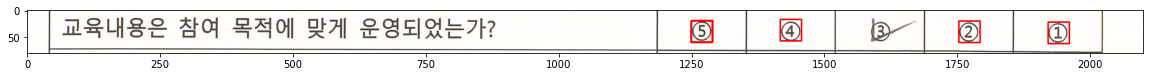

In [163]:
imgList = ['1.png', '2.png', '3.png', '4.png', '5.png']

gray = cv.cvtColor(roi, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(img, 127,255, cv.THRESH_BINARY)

for im in imgList:
    patch = cv.imread(im)
    patch = cv.cvtColor(patch, cv.COLOR_BGR2GRAY)
    patch = cv.resize(patch, (40, 40), interpolation = cv.INTER_CUBIC)
    
    w, h = patch.shape
    
    res = cv.matchTemplate(gray, patch, cv.TM_CCOEFF)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    print(im, min_val, max_val, min_loc, max_loc, top_left, bottom_right)
    cv.rectangle(roi, top_left, bottom_right, 255, 2)
    
plt.imshow(roi)

In [165]:
roi.shape

(80, 2100, 3)

e| Oo | DB |

 



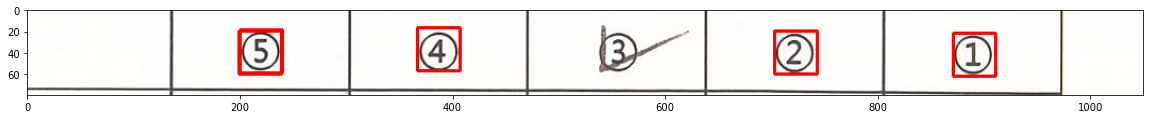

In [168]:
test = roi[:, int(roi.shape[1]/2):]
plt.imshow(test)
cv.imwrite('temp.png', test)        
text = pytesseract.image_to_string(Image.open('temp.png'), lang='eng')
print(text)